In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read all my csv data about prices as a df and concatenate in one file

In [2]:
av_rent14_df = pd.read_csv('2014_lloguer_preu_trim.csv')
av_rent15_df = pd.read_csv('2015_lloguer_preu_trim.csv')
av_rent16_df = pd.read_csv('2016_lloguer_preu_trim.csv')
av_rent17_df = pd.read_csv('2017_lloguer_preu_trim.csv')
av_rent18_df = pd.read_csv('2018_lloguer_preu_trim.csv')
av_rent19_df = pd.read_csv('2019_lloguer_preu_trim.csv')
av_rent20_df = pd.read_csv('2020_lloguer_preu_trim.csv')
av_rent21_df = pd.read_csv('2021_lloguer_preu_trim.csv')
av_rent22_df = pd.read_csv('2022_lloguer_preu_trim.csv')
av_rent23_df = pd.read_csv('2023_lloguer_preu_trim.csv')

dfs_av_rent = [av_rent14_df , av_rent15_df , av_rent16_df , av_rent17_df , av_rent18_df , av_rent19_df , av_rent20_df , av_rent21_df, av_rent22_df, av_rent23_df]

av_rent_df = pd.concat(dfs_av_rent, axis=0, ignore_index=True)

av_rent_df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2014,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),589.55
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),712.79
2,2014,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),540.71
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),673.44
4,2014,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),736.09
...,...,...,...,...,...,...,...,...
5397,2023,2,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),19.2
5398,2023,2,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),11.9
5399,2023,2,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.7
5400,2023,2,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),13.2


#### Translation of the fields
Any: Year

Trimestre: Quarter

Codi_Districte: District Code

Nom_Districte: District Name

Codi_Barri: Neighborhood Code

Nom_Barri: Neighborhood Name

Lloguer_mitja: Average Rent

Preu: Price

### Quick analysis to identify issues in the data

In [3]:
av_rent_df.shape

(5402, 8)

In [4]:
null_count = av_rent_df.isnull().sum()
null_count

Any                 0
Trimestre           0
Codi_Districte      0
Nom_Districte       0
Codi_Barri          0
Nom_Barri           0
Lloguer_mitja       0
Preu              326
dtype: int64

In [5]:
rows_with_null_price = av_rent_df[av_rent_df['Preu'].isnull()]
rows_with_null_price 

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2014,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2014,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
53,2014,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
55,2014,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
57,2014,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
...,...,...,...,...,...,...,...,...
5370,2023,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),NaN
5375,2023,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),NaN
5382,2023,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),NaN
5384,2023,2,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [6]:
# Quick analysis of the distribution of null values

counts = {}

for column in rows_with_null_price.columns:
    counts[column] = rows_with_null_price[column].value_counts()
    print(counts[column])


2019    46
2020    46
2018    44
2014    38
2017    38
2015    32
2022    32
2016    31
2023    19
Name: Any, dtype: int64
1    89
2    84
3    83
4    70
Name: Trimestre, dtype: int64
8    161
7     64
3     51
9     50
Name: Codi_Districte, dtype: int64
Nou Barris        161
Horta-Guinardó     64
Sants-Montjuïc     51
Sant Andreu        50
Name: Nom_Districte, dtype: int64
42    64
56    60
47    56
12    51
58    50
54    39
49     6
Name: Codi_Barri, dtype: int64
la Clota                      64
Vallbona                      60
Can Peguera                   56
la Marina del Prat Vermell    51
Baró de Viver                 50
Torre Baró                    39
Canyelles                      6
Name: Nom_Barri, dtype: int64
Lloguer mitjà per superfície (Euros/m2 mes)    164
Lloguer mitjà mensual (Euros/mes)              162
Name: Lloguer_mitja, dtype: int64
Series([], Name: Preu, dtype: int64)


In [7]:
# I decide to investigate a bit more about the nulls corresponding to the Nou Barris district to make a decision on whether to fill them or not.rows_with_null_price_8 = rows_with_null_price[(rows_with_null_price['Codi_Districte'] == 8) & (rows_with_null_price['Preu'].isnull())]

count_codi_districte_8 = av_rent_df['Codi_Districte'].value_counts()
count_codi_districte_8


8     962
7     814
10    740
3     592
9     518
2     444
5     444
6     370
1     296
4     222
Name: Codi_Districte, dtype: int64

In [8]:
filtered_df = av_rent_df[av_rent_df['Codi_Districte'] == 8]
percentage_nulls = (filtered_df['Preu'].isnull().sum() / len(filtered_df)) * 100
percentage_nulls

16.735966735966738

In [9]:
# As almost 17% of the data for the price in the Nou Barris district is null values, if I create a pivot table, they will be removed. 
# Due to the high proportion, I have decided to fill them with the average price of thr district

In [10]:
import pandas as pd

# Supongamos que tu DataFrame se llama av_rent_df
av_rent_df['Preu'] = pd.to_numeric(av_rent_df['Preu'], errors='coerce')

# Filtrar el DataFrame para el Codi_Districte = 8 y Lloguer_mitja es "Lloguer mitjà mensual (Euros/mes)"
subset1 = av_rent_df[(av_rent_df['Codi_Districte'] == 8) & (av_rent_df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)')]
mean1 = subset1['Preu'].mean()

# Rellenar los NaN con la media correspondiente
av_rent_df.loc[(av_rent_df['Codi_Districte'] == 8) & (av_rent_df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'), 'Preu'] = av_rent_df.loc[(av_rent_df['Codi_Districte'] == 8) & (av_rent_df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'), 'Preu'].fillna(mean1)

# Filtrar el DataFrame para el Codi_Districte = 8 y Lloguer_mitja es "Lloguer mitjà per superfície (Euros/m2 mes)"
subset2 = av_rent_df[(av_rent_df['Codi_Districte'] == 8) & (av_rent_df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)')]
mean2 = subset2['Preu'].mean()

# Rellenar los NaN con la media correspondiente
av_rent_df.loc[(av_rent_df['Codi_Districte'] == 8) & (av_rent_df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'), 'Preu'] = av_rent_df.loc[(av_rent_df['Codi_Districte'] == 8) & (av_rent_df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)'), 'Preu'].fillna(mean2)


In [11]:
null_count = av_rent_df.isnull().sum()
null_count

Any                 0
Trimestre           0
Codi_Districte      0
Nom_Districte       0
Codi_Barri          0
Nom_Barri           0
Lloguer_mitja       0
Preu              185
dtype: int64

In [12]:
duplicates_count = av_rent_df.duplicated().sum()
duplicates_count 

0

In [13]:
columns = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri','Lloguer_mitja', 'Preu']
unique = av_rent_df[columns].nunique()

print(unique)

Any                 10
Trimestre            4
Codi_Districte      10
Nom_Districte       10
Codi_Barri          73
Nom_Barri           73
Lloguer_mitja        2
Preu              3141
dtype: int64


In [14]:
unique_values_any = av_rent_df['Codi_Districte'].unique()
print("Valores únicos en la columna 'Any':", unique_values_any)

Valores únicos en la columna 'Any': [ 1  2  3  4  5  6  7  8  9 10]


### Read all my csv data about number of agreements as a df and concatenate in one file

In [15]:
agreements14_df = pd.read_csv('2014_lloguer_cont_trim.csv')
agreements15_df = pd.read_csv('2015_lloguer_cont_trim.csv')
agreements16_df = pd.read_csv('2016_lloguer_cont_trim.csv')
agreements17_df = pd.read_csv('2017_lloguer_cont_trim.csv')
agreements18_df = pd.read_csv('2018_lloguer_cont_trim.csv')
agreements19_df = pd.read_csv('2019_lloguer_cont_trim.csv')
agreements20_df = pd.read_csv('2020_lloguer_cont_trim.csv')
agreements21_df = pd.read_csv('2021_lloguer_cont_trim.csv')
agreements22_df = pd.read_csv('2022_lloguer_cont_trim.csv')
agreements23_df = pd.read_csv('2023_lloguer_cont_trim.csv')

dfs_agreements = [agreements14_df , agreements15_df , agreements16_df , agreements17_df , agreements18_df , agreements19_df , agreements20_df , agreements21_df, agreements22_df, agreements23_df]

agreements_df = pd.concat(dfs_agreements, axis=0, ignore_index=True)

agreements_df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Contractes,Nombre
0,2014,1,1,Ciutat Vella,1,el Raval,Contractes de lloguer,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,Contractes de lloguer,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,Contractes de lloguer,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Contractes de lloguer,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,Contractes de lloguer,203.0
...,...,...,...,...,...,...,...,...
2733,2023,2,10,Sant Martí,70,el Besòs i el Maresme,Contractes de lloguer,102.0
2734,2023,2,10,Sant Martí,71,Provençals del Poblenou,Contractes de lloguer,82.0
2735,2023,2,10,Sant Martí,72,Sant Martí de Provençals,Contractes de lloguer,95.0
2736,2023,2,10,Sant Martí,73,la Verneda i la Pau,Contractes de lloguer,167.0


#### Translation of the fields
Any: Year

Trimestre: Quarter

Codi_Districte: District Code

Nom_Districte: District Name

Codi_Barri: Neighborhood Code

Nom_Barri: Neighborhood Name

Contractes: Rental contracts

Nombre: Number

### Quick analysis to identify issues in the data

In [16]:
agreements_df.shape

(2738, 8)

In [17]:
null_count = agreements_df.isnull().sum()
null_count

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Contractes        0
Nombre            4
dtype: int64

In [18]:
duplicates_count = agreements_df.duplicated().sum()
duplicates_count 

0

In [19]:
columns = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri','Contractes', 'Nombre']
unique = agreements_df[columns].nunique()

print(unique)

Any                10
Trimestre           4
Codi_Districte     11
Nom_Districte      11
Codi_Barri         74
Nom_Barri          74
Contractes          1
Nombre            544
dtype: int64


In [20]:
# In my categorical fields, there is one more unique value than there should be
# I checking it

In [21]:
unique_values_any = agreements_df['Codi_Districte'].unique()
print("Unique values in 'Any':", unique_values_any)

Unique values in 'Any': [ 1  2  3  4  5  6  7  8  9 10 99]


In [22]:
filtered_rows = agreements_df.loc[agreements_df['Codi_Districte'] == 99]
filtered_rows

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Contractes,Nombre
73,2014,1,99,No consta,99,No consta,Contractes de lloguer,1799.0
147,2014,2,99,No consta,99,No consta,Contractes de lloguer,681.0
221,2014,3,99,No consta,99,No consta,Contractes de lloguer,465.0
295,2014,4,99,No consta,99,No consta,Contractes de lloguer,1798.0
369,2015,1,99,No consta,99,No consta,Contractes de lloguer,1488.0
443,2015,2,99,No consta,99,No consta,Contractes de lloguer,362.0
517,2015,3,99,No consta,99,No consta,Contractes de lloguer,367.0
591,2015,4,99,No consta,99,No consta,Contractes de lloguer,368.0
665,2016,1,99,No consta,99,No consta,Contractes de lloguer,332.0
739,2016,2,99,No consta,99,No consta,Contractes de lloguer,457.0


In [23]:
filtered_rows.count()

Any               37
Trimestre         37
Codi_Districte    37
Nom_Districte     37
Codi_Barri        37
Nom_Barri         37
Contractes        37
Nombre            37
dtype: int64

In [24]:
# There are 37 rows without information about where belong the agreements (neither price info)
# These values are not NaN but are null

### Still analyzing the data, also comparing both dataframes

In [25]:
# av_rent_df and agreements_df don't have the same shape. Why?

In [26]:
av_rent_df_2014_Raval = av_rent_df[(av_rent_df['Any'] <= 2014) & (av_rent_df['Nom_Barri'] == 'el Raval')]
av_rent_df_2014_Raval.head(50)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2014,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),589.55
73,2014,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),550.63
146,2014,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),576.45
219,2014,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),597.00
292,2014,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),10.76
365,2014,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),10.52
438,2014,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),9.84
511,2014,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),10.81


In [27]:
agreements_df_2014_Raval = agreements_df[(agreements_df['Any'] <= 2014) & (agreements_df['Nom_Barri'] == 'el Raval')]
agreements_df_2014_Raval.head(50)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Contractes,Nombre
0,2014,1,1,Ciutat Vella,1,el Raval,Contractes de lloguer,356.0
74,2014,2,1,Ciutat Vella,1,el Raval,Contractes de lloguer,409.0
148,2014,3,1,Ciutat Vella,1,el Raval,Contractes de lloguer,423.0
222,2014,4,1,Ciutat Vella,1,el Raval,Contractes de lloguer,395.0


In [28]:
# In the price dataframe, the column 'Lloguer_mitja' is categorical and can be either euro/month or euro/m2. 
# Therefore, there are approximately twice as many rows in the rental price df as in the number of contracts df
# I want to generate two different columns with price information based on whether it is in euro/month or euro/m2 

In [29]:
null_count = av_rent_df.isnull().sum()
null_count

Any                 0
Trimestre           0
Codi_Districte      0
Nom_Districte       0
Codi_Barri          0
Nom_Barri           0
Lloguer_mitja       0
Preu              185
dtype: int64

In [30]:
# Pivot the DataFrame av_rent_df: 
# As I have already filled in the null values that I considered necessary and significant for the analysis, 
# I will use the aggregation function, which by default removes null values

In [31]:
av_rent_df_pivoted = av_rent_df.pivot_table(index=['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'],
                                           columns='Lloguer_mitja', values='Preu', aggfunc='first')
# Reset the index to have a clean DataFrame structure
av_rent_df_pivoted.reset_index(inplace=True)
# Remove the column name for better clarity
av_rent_df_pivoted.columns.name = None

av_rent_df_pivoted


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes)
0,2014,1,1,Ciutat Vella,1,el Raval,589.55,10.76
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.79,10.58
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.71,14.40
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01
4,2014,1,2,Eixample,5,el Fort Pienc,736.09,10.42
...,...,...,...,...,...,...,...,...
2604,2023,2,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1400.60,19.20
2605,2023,2,10,Sant Martí,70,el Besòs i el Maresme,746.90,11.90
2606,2023,2,10,Sant Martí,71,Provençals del Poblenou,1204.20,16.70
2607,2023,2,10,Sant Martí,72,Sant Martí de Provençals,960.90,13.20


In [32]:
columns = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri','Lloguer mitjà mensual (Euros/mes)', 'Lloguer mitjà per superfície (Euros/m2 mes)']
unique = av_rent_df_pivoted[columns].nunique()

print(unique)

Any                                              10
Trimestre                                         4
Codi_Districte                                   10
Nom_Districte                                    10
Codi_Barri                                       73
Nom_Barri                                        73
Lloguer mitjà mensual (Euros/mes)              2393
Lloguer mitjà per superfície (Euros/m2 mes)     748
dtype: int64


In [33]:
null_count = av_rent_df_pivoted.isnull().sum()
null_count

Any                                            0
Trimestre                                      0
Codi_Districte                                 0
Nom_Districte                                  0
Codi_Barri                                     0
Nom_Barri                                      0
Lloguer mitjà mensual (Euros/mes)              0
Lloguer mitjà per superfície (Euros/m2 mes)    1
dtype: int64

In [34]:
null_rows = av_rent_df_pivoted[av_rent_df_pivoted['Lloguer mitjà per superfície (Euros/m2 mes)'].isnull()]
null_rows

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes)
2478,2023,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,1388.0,NaN


In [35]:
# Where are my null values in Preu? I had 326 rows with null values in the original df

### Merging the two dataframes into one and continue with the analysis to identify issues in the data

In [36]:
df = pd.merge(av_rent_df_pivoted, agreements_df, on=['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'], how='outer')
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes),Contractes,Nombre
0,2014,1,1,Ciutat Vella,1,el Raval,589.55,10.76,Contractes de lloguer,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.79,10.58,Contractes de lloguer,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.71,14.40,Contractes de lloguer,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01,Contractes de lloguer,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.09,10.42,Contractes de lloguer,203.0
...,...,...,...,...,...,...,...,...,...,...
2733,2023,1,9,Sant Andreu,58,Baró de Viver,NaN,NaN,Contractes de lloguer,1.0
2734,2023,1,99,No consta,99,No consta,NaN,NaN,Contractes de lloguer,645.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,NaN,NaN,Contractes de lloguer,5.0
2736,2023,2,9,Sant Andreu,58,Baró de Viver,NaN,NaN,Contractes de lloguer,0.0


In [37]:
null_count = df.isnull().sum()
null_count

Any                                              0
Trimestre                                        0
Codi_Districte                                   0
Nom_Districte                                    0
Codi_Barri                                       0
Nom_Barri                                        0
Lloguer mitjà mensual (Euros/mes)              129
Lloguer mitjà per superfície (Euros/m2 mes)    130
Contractes                                       0
Nombre                                           4
dtype: int64

In [38]:
duplicates_count = df.duplicated().sum()
duplicates_count 

0

In [39]:
columns = ['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri','Lloguer mitjà mensual (Euros/mes)','Lloguer mitjà per superfície (Euros/m2 mes)','Contractes','Nombre']
unique = df[columns].nunique()

print(unique)

Any                                              10
Trimestre                                         4
Codi_Districte                                   11
Nom_Districte                                    11
Codi_Barri                                       74
Nom_Barri                                        74
Lloguer mitjà mensual (Euros/mes)              2393
Lloguer mitjà per superfície (Euros/m2 mes)     748
Contractes                                        1
Nombre                                          544
dtype: int64


In [40]:
# Some conclusions:
# I don't need the Contractes column because it doesn't have information 
# I have 199 nulls in Euros/mes and 201 nulls in Euros/m2 mes
# In categoricals fields Codi and Nom (Districte and Barri), still having one more unique value than there should be (with null values)

### Data cleaning, wrangling, and manipulation techniques to address them

In [41]:
df = df.drop('Contractes', axis=1)
df

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes),Nombre
0,2014,1,1,Ciutat Vella,1,el Raval,589.55,10.76,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.79,10.58,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.71,14.40,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.09,10.42,203.0
...,...,...,...,...,...,...,...,...,...
2733,2023,1,9,Sant Andreu,58,Baró de Viver,NaN,NaN,1.0
2734,2023,1,99,No consta,99,No consta,NaN,NaN,645.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,NaN,NaN,5.0
2736,2023,2,9,Sant Andreu,58,Baró de Viver,NaN,NaN,0.0


In [42]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df

,any,trimestre,codi_districte,nom_districte,codi_barri,nom_barri,lloguer_mitjà_mensual_(euros/mes),lloguer_mitjà_per_superfície_(euros/m2_mes),nombre
0,2014,1,1,Ciutat Vella,1,el Raval,589.55,10.76,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.79,10.58,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.71,14.40,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.09,10.42,203.0
...,...,...,...,...,...,...,...,...,...
2733,2023,1,9,Sant Andreu,58,Baró de Viver,NaN,NaN,1.0
2734,2023,1,99,No consta,99,No consta,NaN,NaN,645.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,NaN,NaN,5.0
2736,2023,2,9,Sant Andreu,58,Baró de Viver,NaN,NaN,0.0


In [43]:
df.rename(columns={'any': 'year'}, inplace=True)
df.rename(columns={'trimestre': 'quarter'}, inplace=True)
df.rename(columns={'codi_districte': 'district_code'}, inplace=True)
df.rename(columns={'nom_districte': 'district_name'}, inplace=True)
df.rename(columns={'codi_barri': 'neighborhood_code'}, inplace=True)
df.rename(columns={'nom_barri': 'neighborhood_name'}, inplace=True)
df.rename(columns={'lloguer_mitjà_mensual_(euros/mes)': 'euros_month'}, inplace=True)
df.rename(columns={'lloguer_mitjà_per_superfície_(euros/m2_mes)': 'euros_m2_month'}, inplace=True)
df.rename(columns={'nombre': 'num_agreements'}, inplace=True)
df

,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,euros_month,euros_m2_month,num_agreements
0,2014,1,1,Ciutat Vella,1,el Raval,589.55,10.76,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.79,10.58,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.71,14.40,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.44,11.01,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.09,10.42,203.0
...,...,...,...,...,...,...,...,...,...
2733,2023,1,9,Sant Andreu,58,Baró de Viver,NaN,NaN,1.0
2734,2023,1,99,No consta,99,No consta,NaN,NaN,645.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,NaN,NaN,5.0
2736,2023,2,9,Sant Andreu,58,Baró de Viver,NaN,NaN,0.0


#### Dealing with null values

In [44]:
null_count = df.isnull().sum()
null_count

year                   0
quarter                0
district_code          0
district_name          0
neighborhood_code      0
neighborhood_name      0
euros_month          129
euros_m2_month       130
num_agreements         4
dtype: int64

In [45]:
rows_with_null_price = df[df['euros_m2_month'].isnull()]
rows_with_null_price.head()

,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,euros_month,euros_m2_month,num_agreements
2478,2023,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,1388.0,NaN,56.0
2609,2014,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,NaN,NaN,1.0
2610,2014,1,7,Horta-Guinardó,42,la Clota,NaN,NaN,1.0
2611,2014,1,9,Sant Andreu,58,Baró de Viver,NaN,NaN,5.0
2612,2014,1,99,No consta,99,No consta,NaN,NaN,1799.0


In [46]:
df.dtypes

year                   int64
quarter                int64
district_code          int64
district_name         object
neighborhood_code      int64
neighborhood_name     object
euros_month          float64
euros_m2_month       float64
num_agreements       float64
dtype: object

In [47]:
df[['euros_month', 'euros_m2_month']] = df[['euros_month', 'euros_m2_month']].apply(pd.to_numeric, errors='coerce')
df.dtypes

year                   int64
quarter                int64
district_code          int64
district_name         object
neighborhood_code      int64
neighborhood_name     object
euros_month          float64
euros_m2_month       float64
num_agreements       float64
dtype: object

In [48]:
# Which strategy I want to follow?

In [49]:
# I check how many nulls of euros_m2_mes per year I have
rows_with_null_price = df[df['euros_m2_month'].isnull()]

null_counts_per_year = rows_with_null_price.groupby('year')['euros_m2_month'].size()
null_counts_per_year

year
2014    15
2015    10
2016    13
2017    16
2018    15
2019    15
2020    15
2021    14
2022    10
2023     7
Name: euros_m2_month, dtype: int64

In [50]:
# I will utilize the mean price for each year and neighborhood to fill in these null values

In [51]:
# Iterate through each year from 2014 to 2023
for year in range(2014, 2024):
    # Iterate through each distinct 'district_name'
    for district in df['district_name'].unique():
        # Calculate the mean for the current year and 'district_name'
        year_district_mean = df[(df['year'] == year) & (df['district_name'] == district)]['euros_month'].mean()
        
        # Print the information for the current year, 'district_name', and the calculated mean
        # print(f'Year: {year}, District: {district}, Mean: {year_district_mean}')
    
    # Fill missing values for the current year and 'district_name' with the calculated mean
        df.loc[(df['year'] == year) & (df['district_name'] == district), 'euros_month'] = df.loc[
            (df['year'] == year) & (df['district_name'] == district), 'euros_month'].fillna(year_district_mean)

# Display the updated DataFrame
df


,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,euros_month,euros_m2_month,num_agreements
0,2014,1,1,Ciutat Vella,1,el Raval,589.550,10.76,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.790,10.58,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.710,14.40,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.440,11.01,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.090,10.42,203.0
...,...,...,...,...,...,...,...,...,...
2733,2023,1,9,Sant Andreu,58,Baró de Viver,831.325,NaN,1.0
2734,2023,1,99,No consta,99,No consta,NaN,NaN,645.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,893.955,NaN,5.0
2736,2023,2,9,Sant Andreu,58,Baró de Viver,831.325,NaN,0.0


In [52]:
# Same strategy for euros_m2_month

for year in range(2014, 2024):
    # Iterate through each distinct 'district_name'
    for district in df['district_name'].unique():
        # Calculate the mean for the current year and 'district_name'
        year_district_mean = df[(df['year'] == year) & (df['district_name'] == district)]['euros_m2_month'].mean()
        
    # Print the information for the current year, 'district_name', and the calculated mean
    # print(f'Year: {year}, District: {district}, Mean: {year_district_mean}')
    
    # Fill missing values for the current year and 'district_name' with the calculated mean
        df.loc[(df['year'] == year) & (df['district_name'] == district), 'euros_m2_month'] = df.loc[
    (df['year'] == year) & (df['district_name'] == district), 'euros_m2_month'].fillna(year_district_mean)

# Display the updated DataFrame
df

,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,euros_month,euros_m2_month,num_agreements
0,2014,1,1,Ciutat Vella,1,el Raval,589.550,10.760000,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.790,10.580000,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.710,14.400000,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.440,11.010000,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.090,10.420000,203.0
...,...,...,...,...,...,...,...,...,...
2733,2023,1,9,Sant Andreu,58,Baró de Viver,831.325,12.933333,1.0
2734,2023,1,99,No consta,99,No consta,NaN,NaN,645.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,893.955,14.080000,5.0
2736,2023,2,9,Sant Andreu,58,Baró de Viver,831.325,12.933333,0.0


In [53]:
null_count = df.isnull().sum()
null_count

year                  0
quarter               0
district_code         0
district_name         0
neighborhood_code     0
neighborhood_name     0
euros_month          37
euros_m2_month       37
num_agreements        4
dtype: int64

In [54]:
# Now, I am left with only 37 rows that lack information except for the number of agreements
# While these values are not marked as NaN, they are, in fact, null
# Due to their limited number, I have decided to proceed with dropping these rows
# With this action I also deal with the extra unique value in my categorical fields
# Similarly, I also drop the 4 rows lacking information about the number of agreements

In [55]:
df = df.dropna()
df

,year,quarter,district_code,district_name,neighborhood_code,neighborhood_name,euros_month,euros_m2_month,num_agreements
0,2014,1,1,Ciutat Vella,1,el Raval,589.550000,10.760000,356.0
1,2014,1,1,Ciutat Vella,2,el Barri Gòtic,712.790000,10.580000,135.0
2,2014,1,1,Ciutat Vella,3,la Barceloneta,540.710000,14.400000,130.0
3,2014,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",673.440000,11.010000,196.0
4,2014,1,2,Eixample,5,el Fort Pienc,736.090000,10.420000,203.0
...,...,...,...,...,...,...,...,...,...
2730,2022,3,9,Sant Andreu,58,Baró de Viver,779.561111,11.983333,3.0
2732,2023,1,7,Horta-Guinardó,42,la Clota,893.955000,14.080000,1.0
2733,2023,1,9,Sant Andreu,58,Baró de Viver,831.325000,12.933333,1.0
2735,2023,2,7,Horta-Guinardó,42,la Clota,893.955000,14.080000,5.0


In [56]:
columns = ['year', 'quarter', 'district_code', 'district_name', 'neighborhood_code', 'neighborhood_name', 'euros_month', 'euros_m2_month', 'num_agreements']
unique = df[columns].nunique()

print(unique)

year                   10
quarter                 4
district_code          10
district_name          10
neighborhood_code      73
neighborhood_name      73
euros_month          2422
euros_m2_month        776
num_agreements        533
dtype: int64


#### Handling Data Types: Numeric and Categorical

In [57]:
df.dtypes

year                   int64
quarter                int64
district_code          int64
district_name         object
neighborhood_code      int64
neighborhood_name     object
euros_month          float64
euros_m2_month       float64
num_agreements       float64
dtype: object

In [58]:
# For year maybe I will consider changing it to a datetime data type, as this can facilitate temporal operations and understanding
# But I will do it after my num variable analysis and correlation matrix 
# df['year'] = pd.to_datetime(df['year'], format='%Y')

df['num_agreements'] = df['num_agreements'].astype('int64')
df.dtypes

C:\Users\laiag\AppData\Local\Temp\ipykernel_17772\3925661065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_agreements'] = df['num_agreements'].astype('int64')


year                   int64
quarter                int64
district_code          int64
district_name         object
neighborhood_code      int64
neighborhood_name     object
euros_month          float64
euros_m2_month       float64
num_agreements         int64
dtype: object

In [59]:
# Split into Categorical and Numerical

In [60]:
# Numerical

In [61]:
num_df = df.select_dtypes(include=np.number).drop(['district_code', 'neighborhood_code'], axis=1)
num_df.head()

,year,quarter,euros_month,euros_m2_month,num_agreements
0,2014,1,589.55,10.76,356
1,2014,1,712.79,10.58,135
2,2014,1,540.71,14.40,130
3,2014,1,673.44,11.01,196
4,2014,1,736.09,10.42,203


In [62]:
def discrete_continuous(df):
    discrete_cols = []
    continuous_cols = []

    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    discrete_df = df[discrete_cols]
    continuous_df = df[continuous_cols]

    return discrete_df, continuous_df

discrete_df, continuous_df = discrete_continuous(num_df)

display(discrete_df)
display(continuous_df)

,year,quarter
0,2014,1
1,2014,1
2,2014,1
3,2014,1
4,2014,1
...,...,...
2730,2022,3
2732,2023,1
2733,2023,1
2735,2023,2


,euros_month,euros_m2_month,num_agreements
0,589.550000,10.760000,356
1,712.790000,10.580000,135
2,540.710000,14.400000,130
3,673.440000,11.010000,196
4,736.090000,10.420000,203
...,...,...,...
2730,779.561111,11.983333,3
2732,893.955000,14.080000,1
2733,831.325000,12.933333,1
2735,893.955000,14.080000,5


In [63]:
# Categorical 

In [64]:
cat_df = df[['district_code', 'neighborhood_code', 'year' ]]
cat_df.nunique()

district_code        10
neighborhood_code    73
year                 10
dtype: int64

In [65]:
# At this point, I decided to drop the columns 'district_name' and 'neighborhood_name' since they contain the same information as 'district_code' and 'neighborhood_code'

In [66]:
df = df.drop(['district_name', 'neighborhood_name'], axis=1)
df

,year,quarter,district_code,neighborhood_code,euros_month,euros_m2_month,num_agreements
0,2014,1,1,1,589.550000,10.760000,356
1,2014,1,1,2,712.790000,10.580000,135
2,2014,1,1,3,540.710000,14.400000,130
3,2014,1,1,4,673.440000,11.010000,196
4,2014,1,2,5,736.090000,10.420000,203
...,...,...,...,...,...,...,...
2730,2022,3,9,58,779.561111,11.983333,3
2732,2023,1,7,42,893.955000,14.080000,1
2733,2023,1,9,58,831.325000,12.933333,1
2735,2023,2,7,42,893.955000,14.080000,5


### EDA

In [67]:
display(df.head(5))
display(df.shape)
display(df.info())

,year,quarter,district_code,neighborhood_code,euros_month,euros_m2_month,num_agreements
0,2014,1,1,1,589.55,10.76,356
1,2014,1,1,2,712.79,10.58,135
2,2014,1,1,3,540.71,14.40,130
3,2014,1,1,4,673.44,11.01,196
4,2014,1,2,5,736.09,10.42,203


(2697, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697 entries, 0 to 2736
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2697 non-null   int64  
 1   quarter            2697 non-null   int64  
 2   district_code      2697 non-null   int64  
 3   neighborhood_code  2697 non-null   int64  
 4   euros_month        2697 non-null   float64
 5   euros_m2_month     2697 non-null   float64
 6   num_agreements     2697 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 168.6 KB


None

In [68]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2697.0,2018.166110,2.716418,2014.00,2016.00,2018.000000,2020.00,2023.0
quarter,2697.0,2.405265,1.102002,1.00,1.00,2.000000,3.00,4.0
euros_month,2697.0,826.147990,259.614342,0.00,648.84,779.561111,933.95,2034.0
euros_m2_month,2697.0,12.250457,2.481892,3.18,10.40,12.200000,13.87,22.9
num_agreements,2697.0,154.217278,142.560137,0.00,51.00,107.000000,223.00,775.0


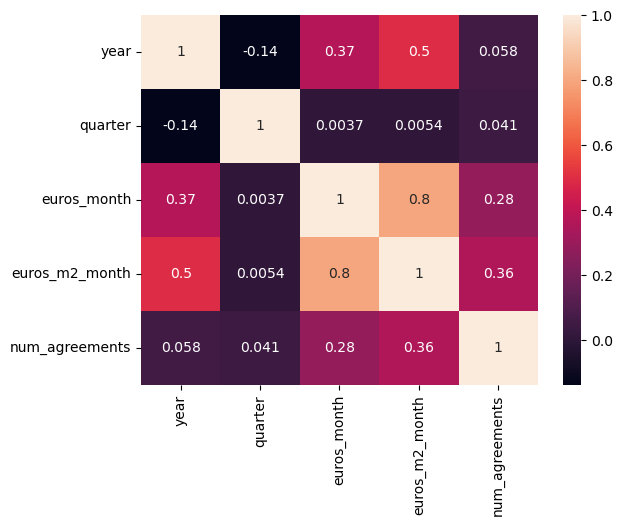

In [69]:
correlations_matrix = num_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

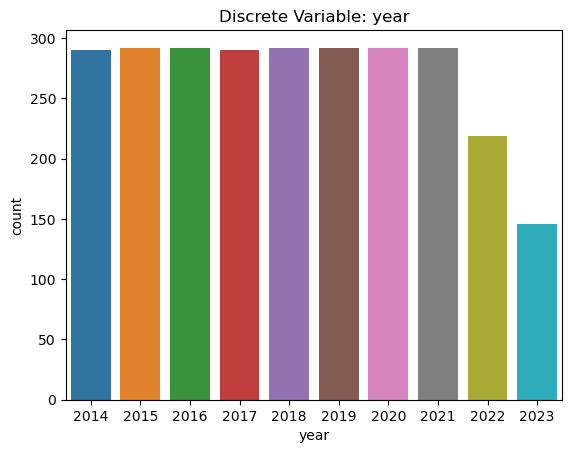

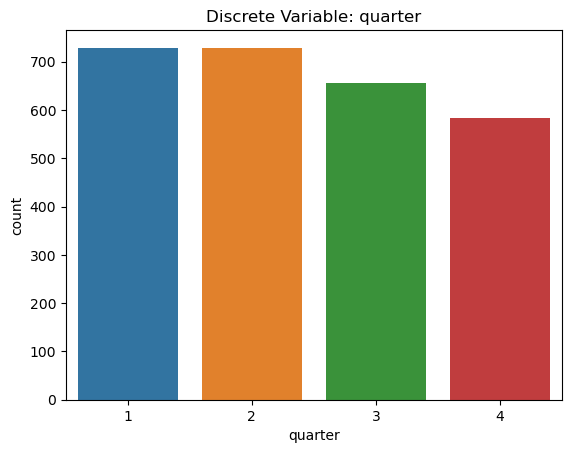

In [70]:
def plot_discrete(dataframe):
    
    for column in discrete_df.columns:
        sns.countplot(data=discrete_df, x=column)
        plt.title(f'Discrete Variable: {column}')
        plt.show()
        
plot_discrete(discrete_df) 

#### Checking outliers and distributions of numerical columns

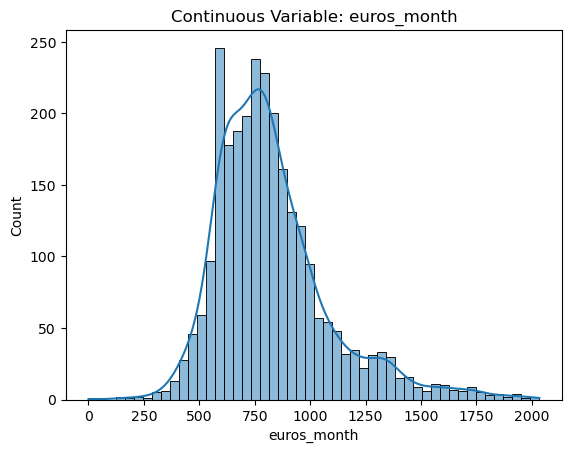

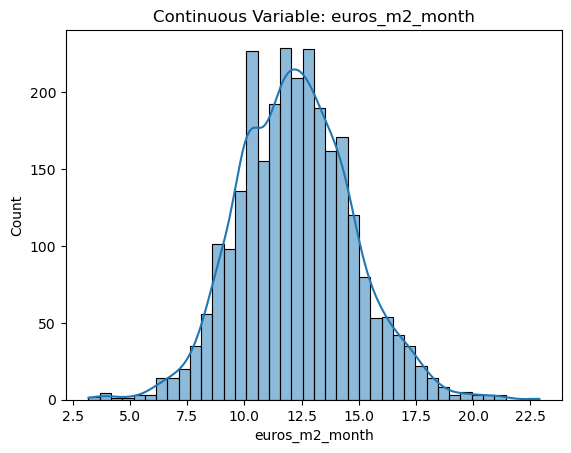

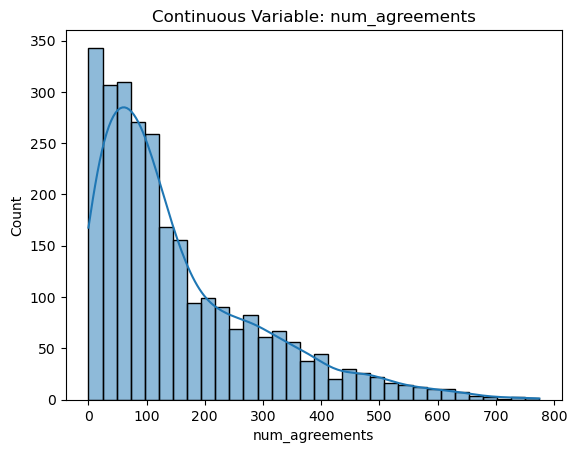

In [71]:
def plot_continuous(dataframe):
    
    for column in continuous_df.columns:
        sns.histplot(data=continuous_df, x=column, kde=True)
        plt.title(f'Continuous Variable: {column}')
        plt.show()

plot_continuous(continuous_df)

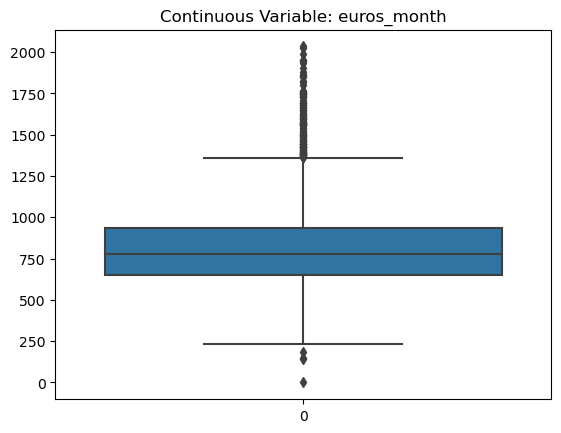

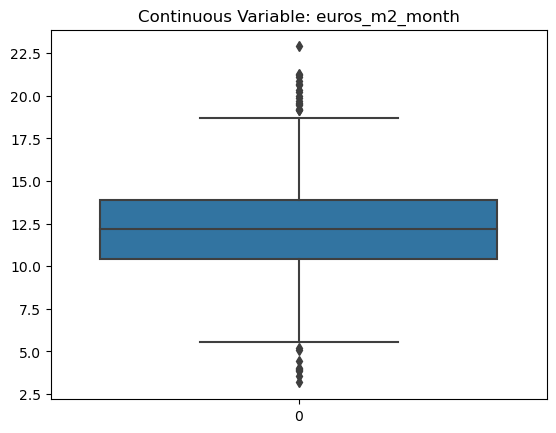

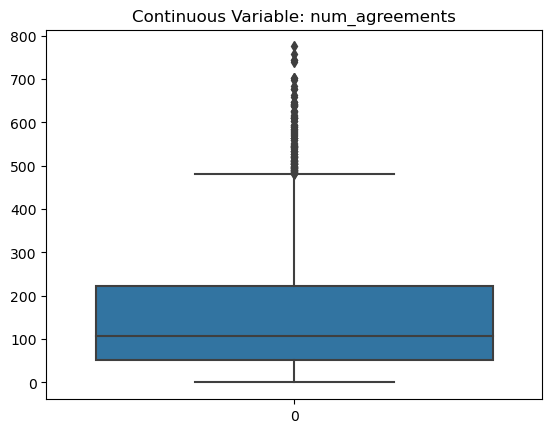

In [72]:
def boxplot_continuous(dataframe):
    
    for column in continuous_df.columns:
        sns.boxplot(data=continuous_df[column])
        plt.title(f'Continuous Variable: {column}')
        plt.show()

boxplot_continuous(continuous_df)


In [73]:
df.dtypes

year                   int64
quarter                int64
district_code          int64
neighborhood_code      int64
euros_month          float64
euros_m2_month       float64
num_agreements         int64
dtype: object